# Imports

In [1]:
import gym
from plot_utils import map_env, map_actions

# Exploring the environment

Agent moves in a grid world.     
Some tiles are walkable, some lead to a hole.   
The lake is frozen and slippery so movement has some uncertainty.   
You receive a reward of 1 if you reach your goal, 0 otherwise.   

S: starting point (safe)    
F: frozen surface (safe)   
H: hole (fall to your doom)    
G: goal   

The agent moves through a 4×4 gridworld, with states numbered as follows:   
```
[[ 0  1  2  3]  
 [ 4  5  6  7]  
 [ 8  9 10 11]  
 [12 13 14 15]]  
```   
and the agent has 4 potential actions:   
```
LEFT = 0  
DOWN = 1  
RIGHT = 2  
UP = 3  
```

In [2]:
# Initialize the gym environment
env = gym.make('FrozenLake-v0')

In [3]:
# Take a look at the environment
env.render()


SFFF
FHFH
FFFH
HFFG


In [4]:
print(env.desc)

[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]


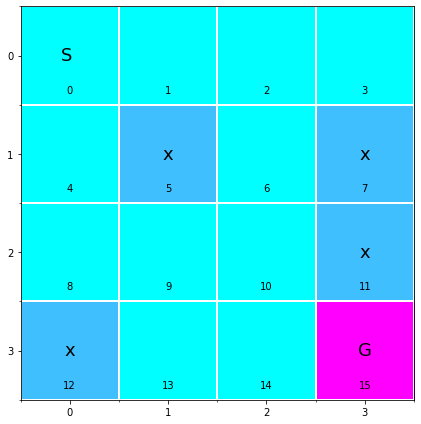

In [5]:
map_env(env)

In [6]:
# Each state has:  prob, next_state, reward, done
print(env.P[0][0])

[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)]


In [7]:
# Note there is also a larger environment
env_large = gym.make('FrozenLake8x8-v0')
env_large.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


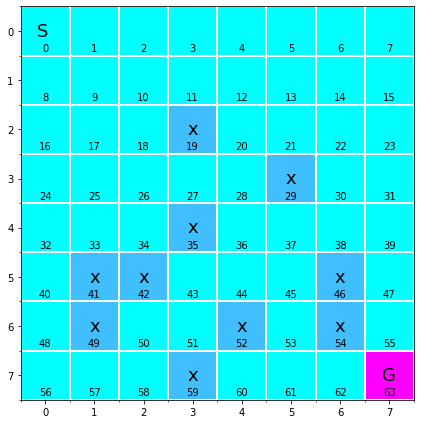

In [8]:
map_env(env_large)

In [9]:
# States

In [10]:
print('Number of state: ', env.nS)
print('State space: ', env.observation_space)

Number of state:  16
State space:  Discrete(16)


In [11]:
# Number of actions
env.nA

4

In [12]:
print('Number of actions: ', env.nA)
print('Action space:', env.action_space)

Number of actions:  4
Action space: Discrete(4)


End of episode
Total reward:  0.0
States:   [0, 4, 5]
Actions:  [2, 2]
Rewards:  [0, 0]
 


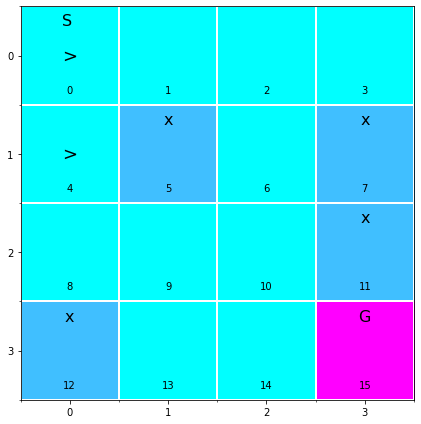

End of episode
Total reward:  0.0
States:   [0, 0, 0, 4, 0, 4, 5]
Actions:  [1, 2, 1, 2, 0, 2]
Rewards:  [0, 0, 0, 0, 0, 0]
 


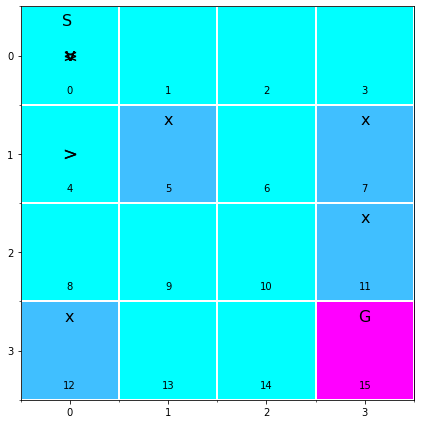

End of episode
Total reward:  0.0
States:   [0, 0, 4, 0, 4, 4, 5]
Actions:  [1, 0, 2, 1, 1, 2]
Rewards:  [0, 0, 0, 0, 0, 0]
 


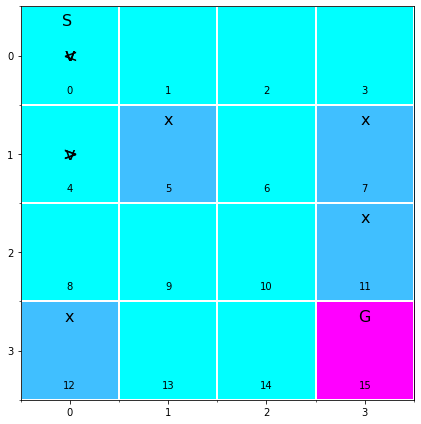

In [13]:
# Take some samples 
for episode in range(3):
    states = []
    actions = []
    rewards = []
    total_reward = 0

    state = env.reset()
    states.append(state)
    while True:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(int(reward))
        total_reward += reward
        if done:
            print('End of episode')
            print('Total reward: ', total_reward)
            print('States:  ', states)
            print('Actions: ', actions)
            print('Rewards: ', rewards)
            print(' ')
            map_actions(env, states, actions)
            break